In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib


In [2]:
df = pd.read_csv("../data/processed/cleaned_data.csv")


In [3]:
tfidf = TfidfVectorizer(
    max_features=10000,
    stop_words="english"
)

X_tfidf = tfidf.fit_transform(df["full_text"])


In [4]:
joblib.dump(X_tfidf, "../models/tfidf_features.pkl")
joblib.dump(tfidf, "../models/tfidf_vectorizer.pkl")

print("TF-IDF features and vectorizer saved successfully")



TF-IDF features and vectorizer saved successfully


In [5]:
import os
os.listdir("../models")


['difficulty_classifier.pkl',
 'difficulty_regressor.pkl',
 'tfidf_features.pkl',
 'tfidf_vectorizer.pkl',
 'vectorizer.pkl']

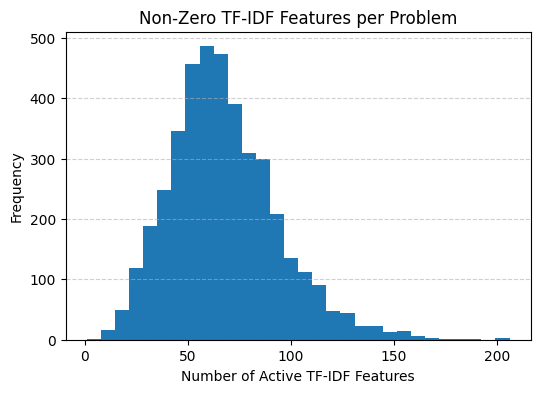

In [6]:
import numpy as np
import matplotlib.pyplot as plt

non_zero_counts = (X_tfidf != 0).sum(axis=1).A1

plt.figure(figsize=(6,4))
plt.hist(non_zero_counts, bins=30)
plt.title("Non-Zero TF-IDF Features per Problem")
plt.xlabel("Number of Active TF-IDF Features")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [9]:
df['text_length'] = df['full_text'].apply(len)


<Figure size 600x400 with 0 Axes>

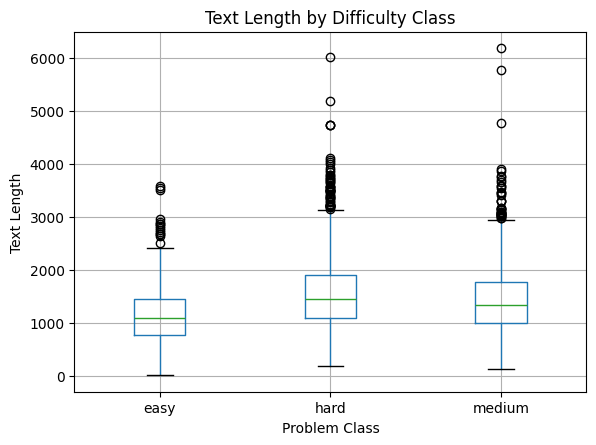

In [10]:
plt.figure(figsize=(6,4))
df.boxplot(column='text_length', by='problem_class')
plt.title("Text Length by Difficulty Class")
plt.suptitle("")
plt.xlabel("Problem Class")
plt.ylabel("Text Length")
plt.show()


In [13]:
import re

def count_math_symbols(text):
    return len(re.findall(r'[=<>+\-*/^]', text))

df['math_symbol_count'] = df['full_text'].apply(count_math_symbols)


<Figure size 600x400 with 0 Axes>

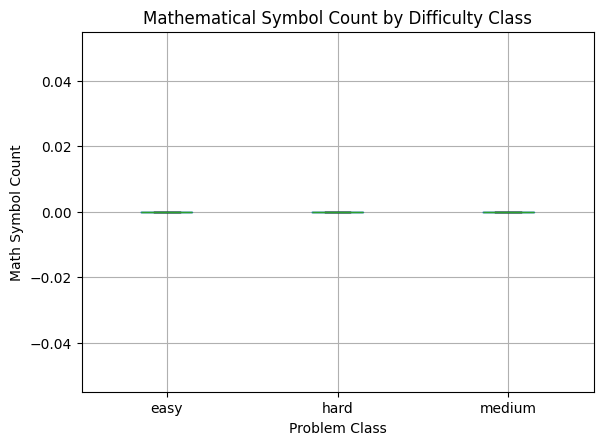

In [15]:
plt.figure(figsize=(6,4))
df.boxplot(column='math_symbol_count', by='problem_class')
plt.title("Mathematical Symbol Count by Difficulty Class")
plt.suptitle("")
plt.xlabel("Problem Class")
plt.ylabel("Math Symbol Count")
plt.show()


In [16]:
keywords = ['graph', 'tree', 'dp', 'dynamic', 'recursion', 'modulo', 'binary', 'search']

def count_keywords(text):
    text = text.lower()
    return sum(text.count(k) for k in keywords)

df['keyword_count'] = df['full_text'].apply(count_keywords)


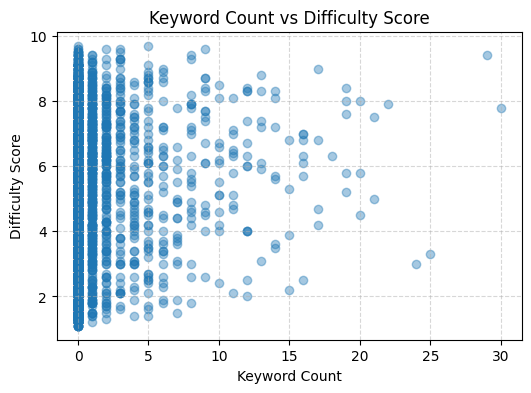

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(df['keyword_count'], df['problem_score'], alpha=0.4)
plt.title("Keyword Count vs Difficulty Score")
plt.xlabel("Keyword Count")
plt.ylabel("Difficulty Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


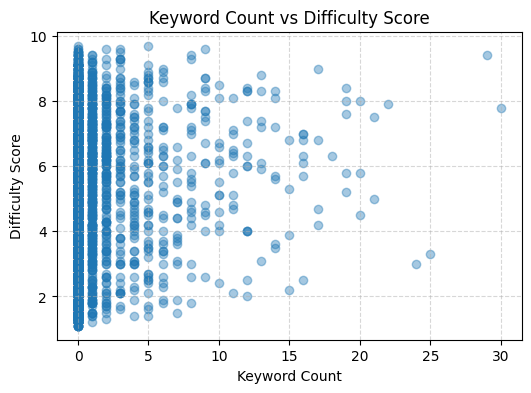

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df['keyword_count'], df['problem_score'], alpha=0.4)
plt.title("Keyword Count vs Difficulty Score")
plt.xlabel("Keyword Count")
plt.ylabel("Difficulty Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


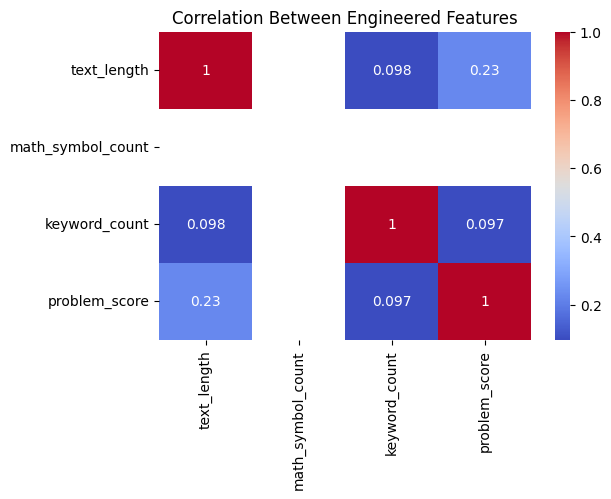

In [19]:
import seaborn as sns

feature_cols = ['text_length', 'math_symbol_count', 'keyword_count', 'problem_score']
corr = df[feature_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Engineered Features")
plt.show()


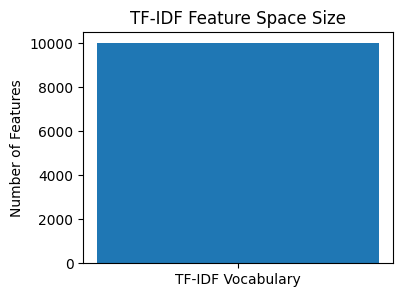

In [20]:
plt.figure(figsize=(4,3))
plt.bar(['TF-IDF Vocabulary'], [X_tfidf.shape[1]])
plt.title("TF-IDF Feature Space Size")
plt.ylabel("Number of Features")
plt.show()
